In [18]:
#参考サイト
#https://note.nkmk.me/python-pandas-sort-values-sort-index/
#https://note.nkmk.me/python-file-io-open-with/
#https://note.nkmk.me/python-pandas-read-csv-tsv/
#https://note.nkmk.me/python-str-compare/

In [ ]:
import re

In [25]:
with open('7203.tsv', mode='w') as wf:
    with open('7203.txt') as rf:
            for rline in rf :
                if re.search('^[0-9]', rline):
                    wf.write(rline)

In [26]:
import pandas as pd

In [31]:
df_tsv = pd.read_table('7203.tsv', index_col=0, names=('Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'AdjClose'))
print(df_tsv.dtypes)
df_tsv.head(10)


Open         object
High        float64
Low         float64
Close       float64
Volume      float64
AdjClose    float64
dtype: object


,Open,High,Low,Close,Volume,AdjClose
Date,,,,,,
2020/06/22,6799,6870.0,6780.0,6818.0,2826600.0,6818.0
2020/06/19,6908,6912.0,6825.0,6851.0,5820300.0,6851.0
2020/06/18,6880,6940.0,6843.0,6887.0,3505100.0,6887.0
2020/06/17,7000,7005.0,6905.0,6944.0,4736800.0,6944.0
2020/06/16,6880,7057.0,6843.0,7021.0,7290400.0,7021.0
2020/06/15,6820,6895.0,6700.0,6700.0,4304800.0,6700.0
2020/06/12,6742,6891.0,6703.0,6853.0,7316300.0,6853.0
2020/06/11,6944,7057.0,6905.0,6905.0,5957200.0,6905.0
2020/06/10,7061,7140.0,7011.0,7094.0,4770800.0,7094.0


In [32]:
import sqlite3

In [34]:
# DB、テーブル作成
dbname = 'STOCK.db'
conn = sqlite3.connect(dbname)
df_tsv.to_sql('T7203', conn, if_exists = 'replace')
# Option => if_exists　: append, replace, fail
conn.close()

In [46]:
import datetime
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
#ワーニング抑止
%matplotlib inline

In [50]:
##------------------------------
## グラフ表示関数
##------------------------------
def show_graph(code, start, end):
    dbname = 'STOCK.db'
    sql = F"select * from {code} where Date between '{start} ' and  '{end} '"

    #DBから日経225平均を取得
    conn = sqlite3.connect(dbname)
    df_tmp = pd.read_sql(sql, conn)
    conn.close()
    
    #DATE型のINDEX作成
    dateidx = []
    for d in df_tmp['Date']:
        formatted = datetime.datetime.strptime(d, "%Y/%m/%d")
        dateidx.append(formatted)
    
    df_tmp['DateIdx'] = dateidx
    df = df_tmp.set_index('DateIdx')

    #全行表示
    #pd.set_option('display.max_rows', None)
    #print(df)
    
    #X軸、Y軸のデータを抽出
    date = df.index
    price= df['AdjClose']

    #移動平均取得
    span01=5
    span02=25
    span03=75
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()

    #グラフの大きさを指定
    plt.figure(figsize=(20,10))

    #株価グラフ
    plt.subplot(2,1,1)   # 縦分割数, 横分割数, 配置位置
    plt.plot(date, price, label='Close', color='#99b898')
    plt.plot(date,df['sma01'], label='Ave 5', color='#e84a5f')
    plt.plot(date,df['sma02'], label='Ave 25', color='#ff847c')
    plt.plot(date,df['sma03'], label='Ave 75', color='#feceab')
    plt.legend()

    #出来高グラフ
    plt.subplot(2,1,2)
    plt.bar(date, df['Volume'], label='Volume', color='grey')
    plt.legend()

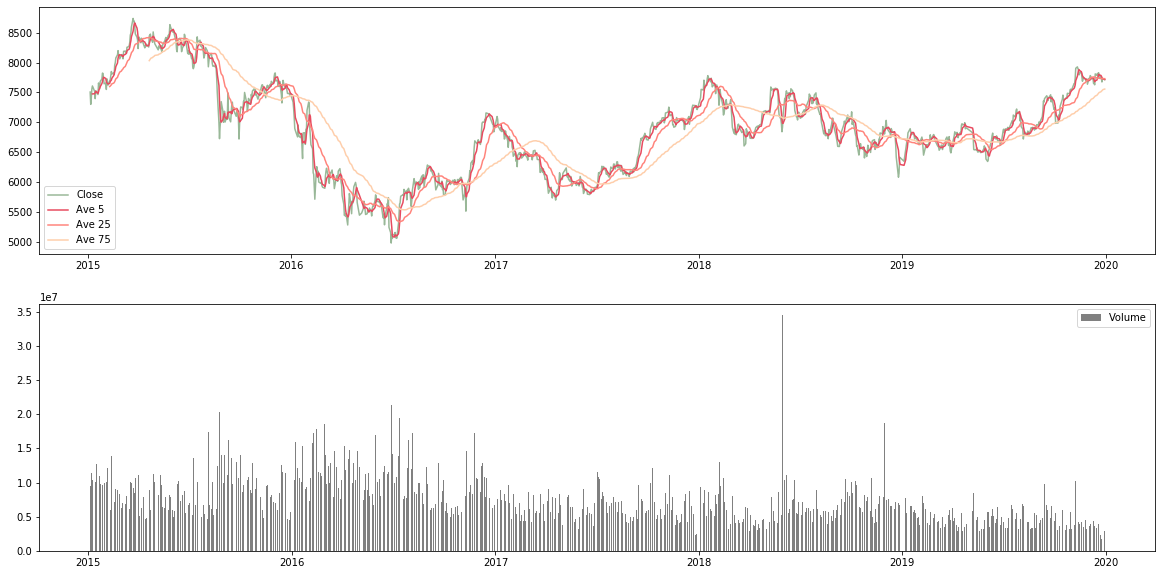

In [52]:
show_graph('T7203', '2015-01-01', '2020-06-30')